<a href="https://colab.research.google.com/github/bakhadir0v/comp215-1-/blob/main/labs/lab06_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 6
----------------#
### Name(s): Ata
#### Date: 26.02.2025

By the end of this lab you should be able to:
  * create a Watts-Strogatz graph both from scratch and from the Networkx module
  * measure the average clustering coefficient and path length of a network
  * visualize summative data of a graph


During this lab, you will be introduced to the following:
  * numpy arrays
  * local file i/o in Google Colab

(this lab is based on workbooks provided in Allen Downey's 'Think Complexity')

## Social Networking

This lab uses graphs to explore social networks using Facebook data.  In this lab you will create a simulated model of the network using a Watts-Strogatz graph and compare some properties of the simulated network and the real Facebook network.

In [ ]:
# put your imports here

In [3]:
import numpy as np
import networkx as nx
import random
from collections import deque

## Get the Facebook Data

Stanford Network Analysis Platform (SNAP) is a general purpose network analysis and graph mining library.  In previous labs, we have used APIs to access data.  For this lab, we will copy the data to a local file.  Download the ```facebook_combined.txt.gz``` file from [SNAP](https://snap.stanford.edu/data/egonets-Facebook.html), unzip it, and copy ```facebook_combined.txt``` to the ```Files``` folder in Colab.  

Look at the content of the file and read the SNAP webpage to understand what the data represents before moving on to the rest of the lab.

## Exercise 1: Make Facebook Graph

Write a function that reads the file, one edge per line, specified by the two integer node IDs given in each line of the file and returns a ```networkx``` graph representing the data.  You can do this with Python's built-in file handling, or you could use ```numpy```'s ```loadtxt``` function.  Write a unit test to check that the network has 4039 nodes and 88234 edges (as given in the Dataset Statistics on the SNAP site) and draw the Facebook network (this takes about a minute).


✅ Unit test passed: The graph has 4039 nodes and 88234 edges.


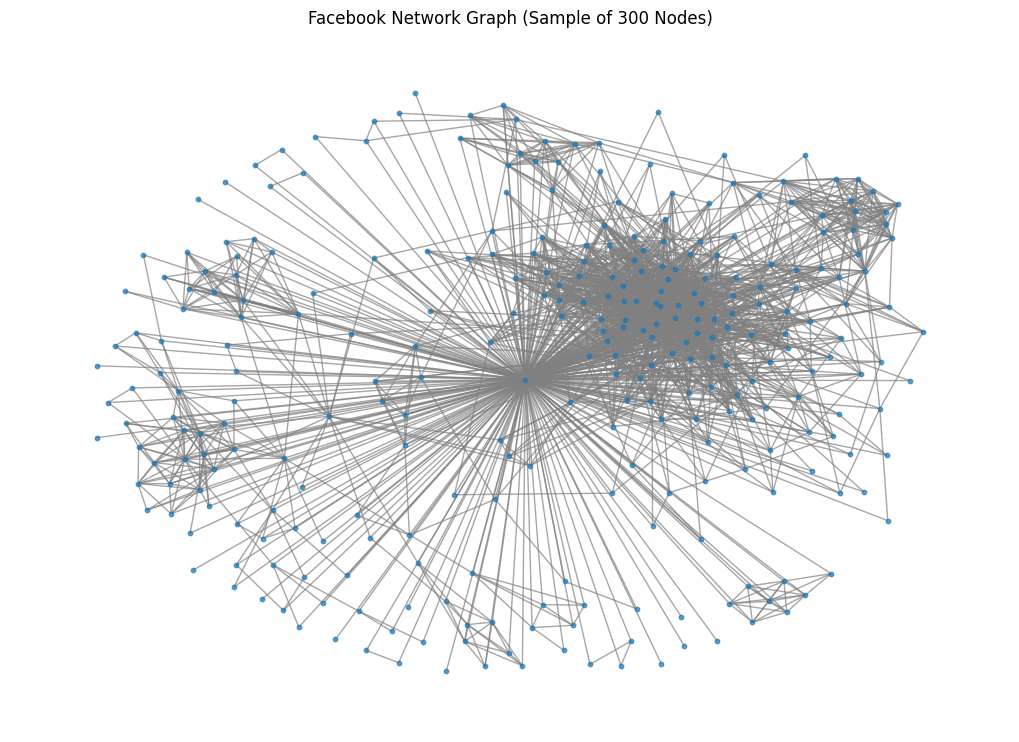

In [1]:
# Ex 1 code here
import networkx as nx
import matplotlib.pyplot as plt

def load_facebook_graph(filename):
    """
    Reads an edge list from the given file and returns a NetworkX graph.

    :param filename: Path to the .txt file containing the edge list.
    :return: NetworkX Graph
    """
    G = nx.Graph()  # Create an empty graph

    with open(filename, "r") as file:
        for line in file:
            node1, node2 = map(int, line.strip().split())  # Read two integers
            G.add_edge(node1, node2)  # Add an undirected edge

    return G

# UnitTest
def test_facebook_graph():
    filename = "/content/facebook_combined.txt"  # Path to file
    G = load_facebook_graph(filename)

    # Check that the graph has the expected number of nodes and edges
    assert len(G.nodes) == 4039, f"Expected 4039 nodes, found {len(G.nodes)}"
    assert len(G.edges) == 88234, f"Expected 88234 edges, found {len(G.edges)}"

    print("✅ Unit test passed: The graph has 4039 nodes and 88234 edges.")

# draw the Facebook network
def draw_facebook_graph(G, sample_size=300):
    """
    Draws a sampled version of the Facebook network for visualization.

    :param G: NetworkX Graph
    :param sample_size: Number of nodes to visualize (full graph is too large)
    """
    plt.figure(figsize=(10, 7))

    # Get a subgraph with a sample of nodes to prevent overcrowding
    sampled_nodes = list(G.nodes)[:sample_size]
    subgraph = G.subgraph(sampled_nodes)

    # Draw
    nx.draw(subgraph, node_size=10, edge_color="gray", alpha=0.7, with_labels=False)

    plt.title(f"Facebook Network Graph (Sample of {sample_size} Nodes)")
    plt.show()

# Load, test it, and draw a sample
filename = "/content/facebook_combined.txt"
G_facebook = load_facebook_graph(filename)
test_facebook_graph()
draw_facebook_graph(G_facebook)

## Exercise 2: Clustering Coefficients

With larger graphs, it can take a long time to compute clustering coefficients and path lengths. We can estimate them by sampling without much loss of accuracy if the sample size is large enough.  Write a function that calculates the average clustering coeffient for a random subset of a N nodes in a network.  You may use the ```node_clustering``` and ```all_pairs``` functions from Chapter 5 of the textbook.  You may also use the ```numpy``` module to calculate the mean; note that there is a ```nanmean``` function.

Check that your clustering coeffients function gives a similar answer to the ```networkx``` ```average_clustering``` function.


In [5]:
# Ex 2 code here
import networkx as nx
import numpy as np
import random

def sample_clustering_coefficient(G, sample_size=500):
    """
    Estimates the average clustering coefficient by randomly sampling nodes.

    :param G: NetworkX Graph
    :param sample_size: Number of nodes to sample
    :return: Estimated average clustering coefficient
    """
    sampled_nodes = random.sample(list(G.nodes()), min(sample_size, len(G)))  # Convert to list
    clustering_values = [nx.clustering(G, node) for node in sampled_nodes]  # clustering coeffs
    return np.nanmean(clustering_values)  # Compute mean, ignoring NaN values

# Compare with NetworkX's full clustering computation
def compare_clustering_methods(G, sample_size=500):
    sampled_clustering = sample_clustering_coefficient(G, sample_size)
    full_clustering = nx.average_clustering(G)

    print(f"Estimated Clustering (Sample {sample_size}): {sampled_clustering:.5f}")
    print(f"True Clustering (Full Graph): {full_clustering:.5f}")

    return sampled_clustering, full_clustering

# Load the graph and test clustering estimation
filename = "/content/facebook_combined.txt"
G_facebook = load_facebook_graph(filename)

compare_clustering_methods(G_facebook, sample_size=500)

Estimated Clustering (Sample 500): 0.60614
True Clustering (Full Graph): 0.60555


(0.6061412052488997, 0.6055467186200876)

## Exercise 3: Average Shortest Path Length

Write a function that calculates the average shortest path length for all pairs of nodes in a network.  You may use the ```shortest_path_dijkstra``` function from Chapter 5 of the textbook.  Using that function, it took my algorithm about 2 minutes to find the average shortest path over all pairs of nodes.


Check that your average shortest path length function gives a similar answer to the ```networkx``` ```average_shortest_path_length``` function.


In [7]:
# Ex 3 code here
def sample_shortest_path_length(G, sample_size=1000):
    """
    Estimates the average shortest path length by randomly sampling node pairs.

    :param G: NetworkX Graph
    :param sample_size: Number of node pairs to sample
    :return: Estimated average shortest path length
    """
    nodes = list(G.nodes())
    path_lengths = []

    for _ in range(sample_size):
        node1, node2 = random.sample(nodes, 2)  # Pick two random nodes
        try:
            length = nx.shortest_path_length(G, source=node1, target=node2, method='dijkstra')
            path_lengths.append(length)
        except nx.NetworkXNoPath:
            continue  # If no path exists, skip this pair

    return np.mean(path_lengths) if path_lengths else float('inf')  # Avoid division by zero

# Compare with NetworkX's full shortest path computation
def compare_shortest_path_methods(G, sample_size=1000):
    sampled_path_length = sample_shortest_path_length(G, sample_size)
    full_path_length = nx.average_shortest_path_length(G)

    print(f"Estimated Shortest Path (Sample {sample_size}): {sampled_path_length:.5f}")
    print(f"True Shortest Path (Full Graph): {full_path_length:.5f}")

    return sampled_path_length, full_path_length

# Load the graph and test shortest path estimation
filename = "/content/facebook_combined.txt"
G_facebook = load_facebook_graph(filename)

compare_shortest_path_methods(G_facebook, sample_size=1000)

Estimated Shortest Path (Sample 1000): 3.68200
True Shortest Path (Full Graph): 3.69251


(3.682, 3.6925068496963913)

Here is a function from the textbook that takes a sample of path lengths to estimate the average shortest path length.  You may use this in the rest of the lab so that you don't need to wait for the whole full averaging algorithms above to run.

In [8]:

def sample_path_lengths(G, nodes=None, trials=100):
    """Choose random pairs of nodes and compute the path length between them.
    G: Graph
    N: number of pairs to choose
    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)

    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair)
               for pair in pairs]
    return lengths

def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

In the exercises above, you should have found that the Facebook network has an average clustering coefficient around 0.6 and an average shortest path length of around 3.7. Note that this corresponds to a 'degree of separation' of less than 6.   

## Exercise 4: WS Graph

Construct a WS graph with the same number of nodes and average degree as the Facebook network using the ```make_ws_graph``` function from Chapter 5.  Find the value of p (probability of rewire) that reproduces a clustering coefficient and average shortest path length of the Facebook network.  (Note that there is a ```nx.watts_strogatz_graph``` that you may use after you have demonstrated that you can create a WS graph using the functions from Chapter 5.).

What could this value of p tell you about the actual social network that this Facebook data represents?  (Think about what p means in the model and what that would represent in the data.)

Facebook Graph: N=4039, Avg Degree=43, Clustering=0.6055, Path Length=3.6880
p=0.00: C_ws=0.7317, L_ws=49.6190, Error=46.0572
p=0.05: C_ws=0.6221, L_ws=3.2550, Error=0.4495
p=0.11: C_ws=0.5263, L_ws=3.0180, Error=0.7493
p=0.16: C_ws=0.4427, L_ws=2.8860, Error=0.9649
p=0.21: C_ws=0.3649, L_ws=2.8420, Error=1.0866
p=0.26: C_ws=0.2973, L_ws=2.7890, Error=1.2072
p=0.32: C_ws=0.2405, L_ws=2.7640, Error=1.2890
p=0.37: C_ws=0.1911, L_ws=2.7380, Error=1.3644
p=0.42: C_ws=0.1491, L_ws=2.7440, Error=1.4005
p=0.47: C_ws=0.1135, L_ws=2.7140, Error=1.4661
p=0.53: C_ws=0.0850, L_ws=2.6700, Error=1.5385
p=0.58: C_ws=0.0627, L_ws=2.6680, Error=1.5628
p=0.63: C_ws=0.0456, L_ws=2.6460, Error=1.6019
p=0.68: C_ws=0.0324, L_ws=2.6280, Error=1.6331
p=0.74: C_ws=0.0226, L_ws=2.6550, Error=1.6159
p=0.79: C_ws=0.0164, L_ws=2.6420, Error=1.6352
p=0.84: C_ws=0.0128, L_ws=2.6220, Error=1.6587
p=0.89: C_ws=0.0110, L_ws=2.6250, Error=1.6576
p=0.95: C_ws=0.0104, L_ws=2.6210, Error=1.6622
p=1.00: C_ws=0.0102, L_ws=2.

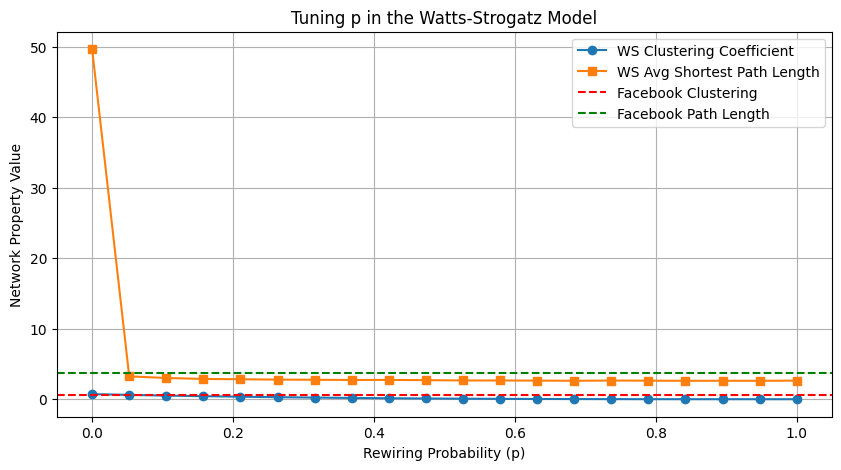

In [9]:
# Ex 4 code here
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def get_facebook_stats(G_facebook):
    """Extracts key properties from the Facebook network graph."""
    N = G_facebook.number_of_nodes()
    K = int(np.mean([deg for _, deg in G_facebook.degree()]))  # Average degree
    C_fb = nx.average_clustering(G_facebook)
    L_fb = estimate_path_length(G_facebook, trials=1000)  # Using sampling

    print(f"Facebook Graph: N={N}, Avg Degree={K}, Clustering={C_fb:.4f}, Path Length={L_fb:.4f}")
    return N, K, C_fb, L_fb

def find_best_p(N, K, C_fb, L_fb, p_values=np.linspace(0, 1, 20)):
    """Finds the best WS graph rewiring probability p that matches Facebook's clustering and path length."""
    best_p = None
    min_error = float('inf')

    results = []
    for p in p_values:
        G_ws = nx.watts_strogatz_graph(N, K, p)
        C_ws = nx.average_clustering(G_ws)
        L_ws = estimate_path_length(G_ws, trials=1000)

        error = abs(C_ws - C_fb) + abs(L_ws - L_fb)  # Combined error measure
        results.append((p, C_ws, L_ws, error))

        if error < min_error:
            min_error = error
            best_p = p

        print(f"p={p:.2f}: C_ws={C_ws:.4f}, L_ws={L_ws:.4f}, Error={error:.4f}")

    return best_p, results

# Load Graph
filename = "/content/facebook_combined.txt"
G_facebook = load_facebook_graph(filename)

# Get Facebook network properties
N, K, C_fb, L_fb = get_facebook_stats(G_facebook)

# Find best p for WS model
best_p, results = find_best_p(N, K, C_fb, L_fb)

print(f"Best p for WS model: {best_p:.2f}")

# Plot
p_values, C_ws_vals, L_ws_vals, errors = zip(*results)
plt.figure(figsize=(10, 5))
plt.plot(p_values, C_ws_vals, label="WS Clustering Coefficient", marker='o')
plt.plot(p_values, L_ws_vals, label="WS Avg Shortest Path Length", marker='s')
plt.axhline(y=C_fb, color='r', linestyle='--', label="Facebook Clustering")
plt.axhline(y=L_fb, color='g', linestyle='--', label="Facebook Path Length")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Network Property Value")
plt.legend()
plt.title("Tuning p in the Watts-Strogatz Model")
plt.grid()
plt.show()